# Task description

### Goal
Predict if a passenger survived the sinking of the Titanic or not. 
### Metric
Accuracy.
### Output
csv file with exactly 418 entries plus a header row.
The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains binary predictions: 1 for survived, 0 for deceased)

# Development
Let's start with importing numpy and pandas

In [256]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score

In [257]:
# load training data
train = pd.read_csv('../input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Training set summary:

In [258]:
train.shape

(891, 12)

In [259]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [260]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [261]:
# load test set
test = pd.read_csv('../input/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Test set summary

In [262]:
test.shape

(418, 11)

In [263]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [264]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [265]:
# missing values in training set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [266]:
# missing values in test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Now we have to prepare datasets for future processing. It includes filling empty values, coming up with new features,  converting symbolical, categorical and continuos data into numerical, normalization.

In [267]:
# PassengerId 

# auto-generated, it's safe to drop it
train = train.drop(['PassengerId'], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


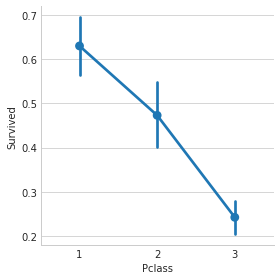

In [268]:
# Pclass

sns.factorplot('Pclass', 'Survived', data=train)

pclass_dummies_titanic  = pd.get_dummies(train['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

train = train.join(pclass_dummies_titanic)
test = test.join(pclass_dummies_test)

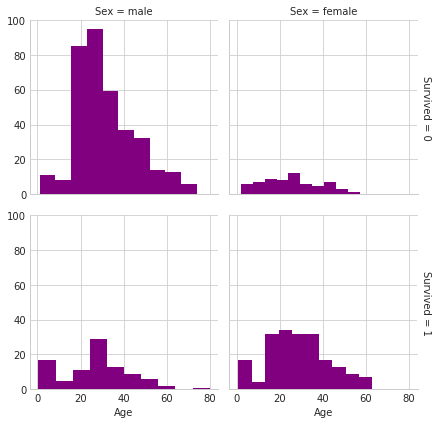

In [269]:
# Sex

g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

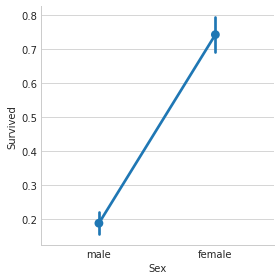

In [270]:
sns.factorplot('Sex', 'Survived', data=train)

In [271]:
person_dummies_titanic  = pd.get_dummies(train['Sex'])
person_dummies_titanic.columns = ['Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Sex'])
person_dummies_test.columns = ['Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train = train.join(person_dummies_titanic)
test = test.join(person_dummies_test)

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


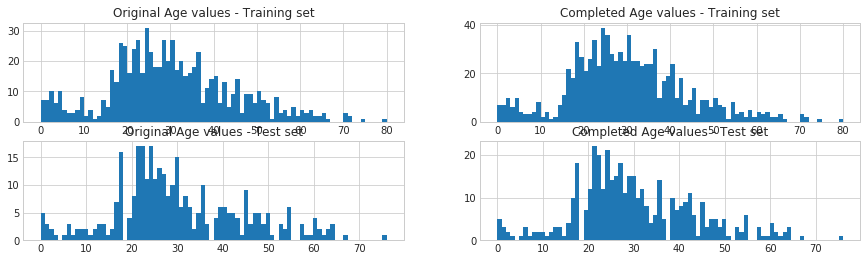

In [272]:
# Age

# values are from 0.42 to 80
# some records are missing age, need to fill somehow

fig, axes = plt.subplots(2, 2, figsize=(15,4))
axis1 = axes[0, 0]
axis2 = axes[0, 1]
axis3 = axes[1, 0]
axis4 = axes[1, 1]
axis1.set_title('Original Age values - Training set')
axis2.set_title('Completed Age values - Training set')
axis3.set_title('Original Age values - Test set')
axis4.set_title('Completed Age values - Test set')

# Let's fill missing values by randomly generating random values from range (mean - std, mean + std)
train_mean = train['Age'].mean()
train_std = train['Age'].std()
train_null_count = train['Age'].isnull().sum()

# generate age values
train_rand = np.random.randint(train_mean - train_std, train_mean + train_std, size=train_null_count)

# plot original age values
train['Age'].dropna().astype(int).hist(bins=80, ax=axis1)

# replace 'Nan' age values with generated
train['Age'][np.isnan(train['Age'])] = train_rand

# convert all age value to int
train['Age'] = train['Age'].astype(int)

# plot completed age values
train['Age'].hist(bins=80, ax=axis2)

# do the same for test set
test_mean = test['Age'].mean()
test_std = test['Age'].std()
test_null_count = test['Age'].isnull().sum()
test_rand = np.random.randint(test_mean - test_std, test_mean + test_std, size=test_null_count)
test['Age'].dropna().astype(int).hist(bins=80, ax=axis3)
test['Age'][np.isnan(test['Age'])] = test_rand
test['Age'] = test['Age'].astype(int)
test['Age'].hist(bins=80, ax=axis4)

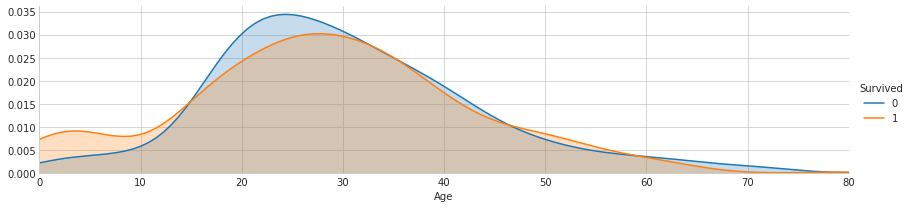

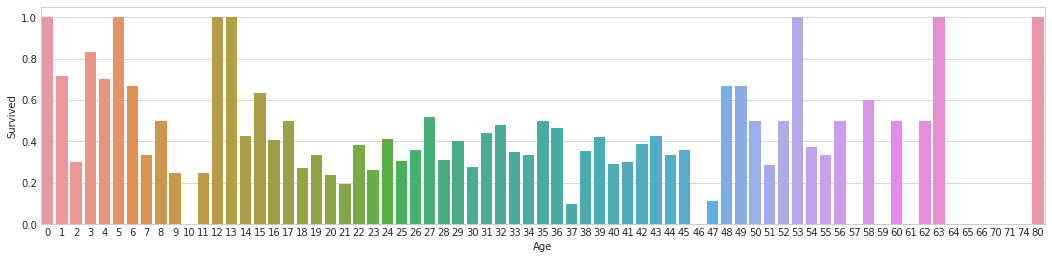

In [273]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [274]:
# Looks like children and elder people have higher chance of survival.
# IsChild has good correlation with survival
# IsElder has weak correlation, removing it

train['IsChild'] = (train['Age'] < 14).astype(int)
test['IsChild'] = (test['Age'] < 14).astype(int)

In [275]:
# Name

# I think I can extract some info from it later, like length or title, but for now I'll just throw it away

train = train.drop(['Name'], axis=1)
train.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Female,IsChild
0,0,22,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0
1,1,38,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,1,35,1,0,113803,53.1000,C123,S,1,0,1,0
4,0,35,0,0,373450,8.0500,NaN,S,0,0,0,0


In [276]:
test = test.drop(['Name'], axis=1)
test.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Female,IsChild
0,892,34,0,0,330911,7.8292,NaN,Q,0,0,0,0
1,893,47,1,0,363272,7.0000,NaN,S,0,0,1,0
2,894,62,0,0,240276,9.6875,NaN,Q,0,1,0,0
3,895,27,0,0,315154,8.6625,NaN,S,0,0,0,0
4,896,22,1,1,3101298,12.2875,NaN,S,0,0,1,0


In [277]:
# SibSp

# I'll leave it as is, further it can be combined with Parch

In [278]:
# Parch

# I'll leave it as is, later it can be combined with SibSp

In [279]:
# Ticket

# Drop it as it's not evident how it can be useful
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

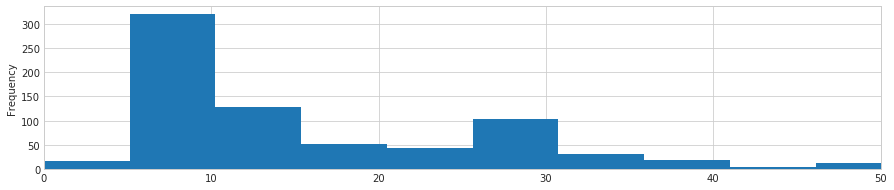

In [280]:
# Fare

# There is one missing value in test set. Let's set it just to be median.
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Fare'].isnull().sum()

train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

In [281]:
# Cabin

# A lot of missing values, jsut drop it.
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

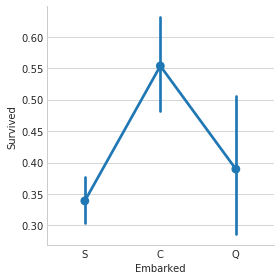

In [282]:
# Embarked

# 2 missing values in train set, just set it to mist common value which is 'S'
train['Embarked'] = train['Embarked'].fillna('S')
sns.factorplot('Embarked', 'Survived', data=train)

train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 0})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 0})

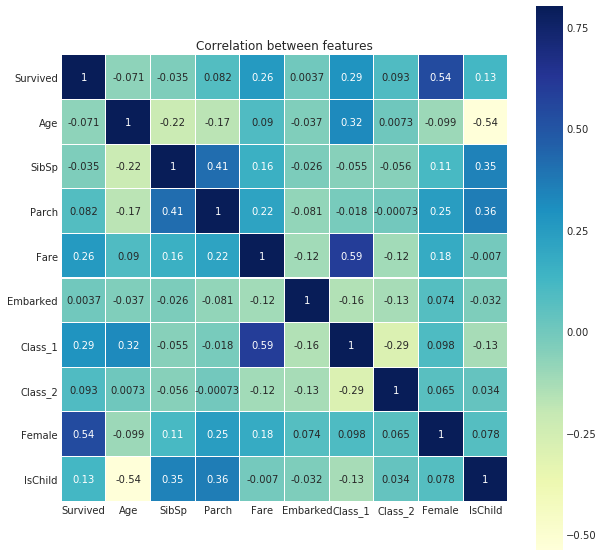

In [283]:
corr = train.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Female      891 non-null uint8
IsChild     891 non-null int64
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.4 KB


In [285]:
train.describe()

,Survived,Age,SibSp,Parch,Fare,Embarked,Class_1,Class_2,Female,IsChild
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.518519,0.523008,0.381594,32.204208,0.086420,0.242424,0.206510,0.352413,0.079686
std,0.486592,13.462993,1.102743,0.806057,49.693429,0.281141,0.428790,0.405028,0.477990,0.270958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Class_1        418 non-null uint8
Class_2        418 non-null uint8
Female         418 non-null uint8
IsChild        418 non-null int64
dtypes: float64(1), int64(6), uint8(3)
memory usage: 24.2 KB


In [287]:
test.describe()

,PassengerId,Age,SibSp,Parch,Fare,Embarked,Class_1,Class_2,Female,IsChild
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.124402,0.447368,0.392344,35.576535,0.110048,0.255981,0.222488,0.363636,0.066986
std,120.810458,13.175401,0.896760,0.981429,55.850103,0.313324,0.436934,0.416416,0.481622,0.250297
min,892.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,21.250000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1204.750000,38.000000,1.000000,0.000000,31.471875,0.000000,1.000000,0.000000,1.000000,0.000000
max,1309.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
# let's get down to business

X_train = train.drop(['Survived'], axis=1)
Y_train = train['Survived']

In [289]:
# Logistics regression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

log_reg.score(X_train, Y_train)

0.81144781144781142

In [290]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

knn.score(X_train, Y_train)

0.82491582491582494

In [291]:
# SVM

svm = SVC()
svm.fit(X_train, Y_train)

svm.score(X_train, Y_train)

0.86868686868686873

In [292]:
# Gaussian Naive Bayes

bayes = GaussianNB()
bayes.fit(X_train, Y_train)

bayes.score(X_train, Y_train)

0.80808080808080807

In [293]:
# Random Forests

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)

forest.score(X_train, Y_train)

0.9854096520763187

In [294]:
# looks like random forests is the most promising (if not overfitted)
# let's try it

X_test = test.drop(['PassengerId'], axis=1)

Y_pred = forest.predict(X_test)

In [295]:
# This gives us 0.74162 score which is bad. Looks like we face overfitting problem. 
# Cross-validation set may help us.

In [296]:
# Logistics regression

log_reg = LogisticRegression()

kf = KFold(train.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(log_reg, X_train, Y_train, cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(log_reg, X_train, Y_train, scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.727242224481


In [297]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
kf = KFold(train.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(knn, X_train, Y_train, cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(knn, X_train, Y_train, scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.552752182983


In [298]:
# SVM

svm = SVC()
kf = KFold(train.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(svm, X_train, Y_train, cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(svm, X_train, Y_train, scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.49983410161


In [299]:
# Gaussian Naive Bayes

bayes = GaussianNB()
kf = KFold(train.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(bayes, X_train, Y_train, cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(bayes, X_train, Y_train, scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.705961305874


In [300]:
forest = RandomForestClassifier(n_estimators=100)
kf = KFold(train.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(forest, X_train, Y_train, cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(forest, X_train, Y_train, scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.742320659973


In [303]:
# Looks like random forest is indeed was the best case. 
# Feature importance!
# Let's works on features next.
# Pclass modification leads to 0.74641 score (Pclass -> Class_1, Class_2)
# Age: addition of IsChild and IsElder gives 0.71770, removing IsElder
# Age: IsChild only (<14 years) gives 0.75119
# Age: Replacing age with bins (of size 14) worsens to 0.7368, reverting
# Sex: Sex -> Female gives 0.75598

In [302]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)